# Assignment 2: Due Tuesday 9/19

## 2D Projectile Motion with Quadratic Drag 

Quadratic drag term is given by $\vec{f}_{drag} = -cv\vec{v}$. This leads to equations of motion in the horizontal ($x$) and vertical ($y$) directions given by 

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

,where $'$ is a time derivative.

You can read more about drag forces here: https://openstax.org/books/university-physics-volume-1/pages/6-4-drag-force-and-terminal-speed

## Problem

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

# Part a)

Ignoring air resistance completely, write down the equations of motion for the cannonball (use the markup feature in Jupyter notbook and latex (https://en.wikibooks.org/wiki/LaTeX/Mathematics)). Your answer should depend on only $v_x, v_y,$ and $g$ 

Equations with no air resistance ($c = 0$):

* $v_x' = \frac{-\left(c\sqrt{v_x^2 + v_y^2}\right)v_x} {m} = 0 $

* $x' = v_x$

* $v_y' = \frac{-mg -\left(c\sqrt{v_x^2 + v_y^2}\right)v_y} {m} = 0 $

* $y' = v_y $

Code the equations into a function 

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import odeint
%matplotlib notebook


#     m = ((4/3)*3.14*(7.5**3)*7.8 )
#     vpx = -(c*np.sqrt((vx**2)+(vy**2))*vx)/m
#     vpy = (-(m*9.81)-(c*np.sqrt((vx**2)+(vy**2))*vy))/m


#define projectile motion function in vaccum
def proj_vac(t, state):
    
    c = 0
    g = 9.81
    
    x = state[0]
    y = state[1]
    
    vx = state[2]
    vy = state[3]
    
    dxdt = vx
    dydt = vy
    
    dvxdt = 0
    dvydt = -g
  
    ans = [dxdt, dydt, dvxdt, dvydt]
    return ans


Using Scipy (*RK4(5)* method) solve numerically $x(t)$ and $y(t)$ for $0 \le t \le 50\;s$

In [2]:
#code
x0 = 0;
y0 = 0;
v = 300;
angle = 50;
vx0 = v*np.cos(np.radians(angle))
vy0 = v*np.sin(np.radians(angle))

initial_state = [x0, y0, vx0, vy0]

t0=0
tf =50
t_s= np.linspace(t0, tf, 1000)
res = integrate.solve_ivp(proj_vac, (t_s[0], t_s[-1]), initial_state, method='RK45', t_eval=t_s)
print(res)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 50
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.05005005,  0.1001001 ,  0.15015015,  0.2002002 ,
        0.25025025,  0.3003003 ,  0.35035035,  0.4004004 ,  0.45045045,
        0.5005005 ,  0.55055055,  0.6006006 ,  0.65065065,  0.7007007 ,
        0.75075075,  0.8008008 ,  0.85085085,  0.9009009 ,  0.95095095,
        1.001001  ,  1.05105105,  1.1011011 ,  1.15115115,  1.2012012 ,
        1.25125125,  1.3013013 ,  1.35135135,  1.4014014 ,  1.45145145,
        1.5015015 ,  1.55155155,  1.6016016 ,  1.65165165,  1.7017017 ,
        1.75175175,  1.8018018 ,  1.85185185,  1.9019019 ,  1.95195195,
        2.002002  ,  2.05205205,  2.1021021 ,  2.15215215,  2.2022022 ,
        2.25225225,  2.3023023 ,  2.35235235,  2.4024024 ,  2.45245245,
        2.5025025 ,  2.55255255,  2.6026026 ,  2.65265265,  2.7027027 ,
        2.75275275,  2.8028028

Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range. At what time does the ball hit the ground?

<IPython.core.display.Javascript object>


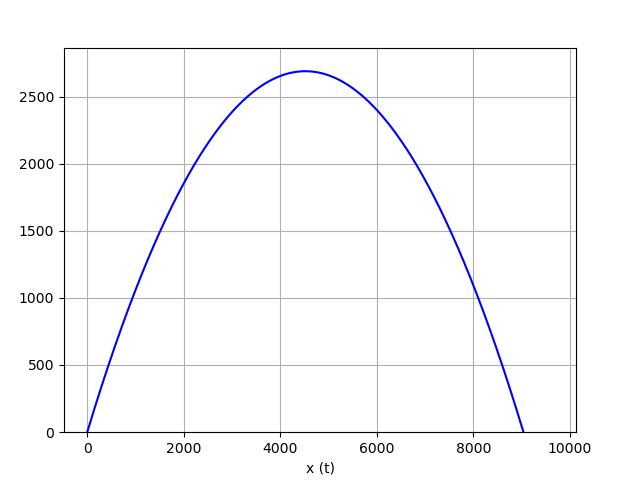

In [14]:
#codesfig = plt.figure('Integrator')
fig = plt.figure('No Air Resistance')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(res.y[0], res.y[1],'b', label=r'$x$')
plt.ylim(0)
ax.set_xlabel('x (t)')
ax.grid()

# Part b)

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part].

<IPython.core.display.Javascript object>


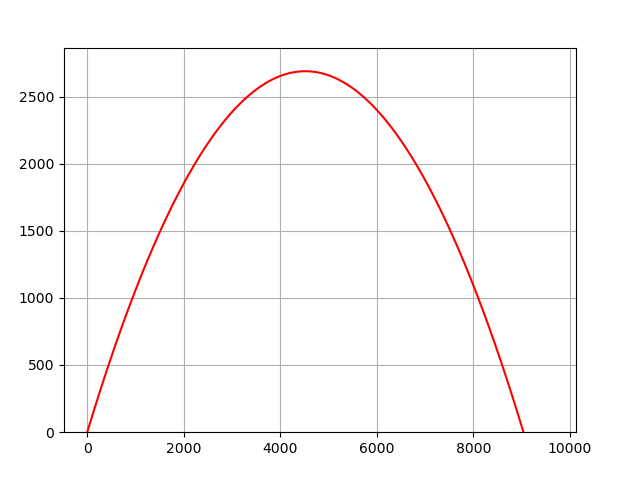

(0.0, 2865.0379203597017)

In [4]:
#codes
def rungekutta_1(f,t,x0,args=()):
    n = len(t)
    x = np.zeros((n,len(x0)))
    x[0] = x0
    for i in range (0,n-1):
        dt = t[i+1]-t[i]
        k1 = f(t[i], x[i])
        k2 = f(t[i]+(dt/2), x[i]+np.array(k1)*(dt/2))
        k3 = f(t[i]+(dt/2), x[i]+np.array(k2)*(dt/2))
        k4 = f(t[i]+dt, x[i] + np.array(k3)*dt)
        x[i+1] = x[i]+(dt/6)*(np.array(k1) + (2*np.array(k2)) + (2*np.array(k3)) + np.array(k4))
    return x


res_rk_impl = rungekutta_1(proj_vac,t_s,initial_state,args=(9.81,))

#really an Nx2 e.g sol_rk1[N,2]

fig = plt.figure('RK Order 4 Implementation (No Air Resistance)')
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(res_rk_impl[:, 0],res_rk_impl[:, 1], 'r', label=r'$x$')
ax.grid()
plt.ylim(0)

How does your Runge-Kutta 4th order evaluation compare to Scipy's *RK4(5)* method?

Very similar...

# Part c)

Now include air resistance, but ignore the variation of atmospheric pressure [that is  treat $c(y)$ as a constant  that does not change with position, where $c = \gamma D^2$].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex). Your answers should depend only on $c, m, v, v_x, v_y,$ and $g$.

Equations with no air resistance ($c = const$):

* $v_x' = \frac{-\left(c\sqrt{v_x^2 + v_y^2}\right)v_x} {m} $

* $x' = v_x $

* $v_y' = \frac{-mg -\left(c\sqrt{v_x^2 + v_y^2}\right)v_y} {m} $

* $y' = v_y$

Code the equations into a function

In [5]:
#code

d = 0.15
gama = 0.25
lmbd = 10000
m = ((4/3)*3.14*((d/2)**3)*7800)
# c = (0.25*(0.15**2))
g = 9.81

def const_drag(gama, d):
    
    return (gama*(d**2))

def proj_vac2(t, state, m, g, d, gama):
    
    g = 9.81
    
    x = state[0]
    y = state[1]
    
    vx = state[2]
    vy = state[3]
    
    dxdt = vx
    dydt = vy
    
    c = const_drag(gama,d)
    
    dvxdt = -(c*np.sqrt((vx**2)+(vy**2))*vx)/m
    dvydt = (-(m*9.81)-(c*np.sqrt((vx**2)+(vy**2))*vy))/m
  
    ans = [dxdt, dydt, dvxdt, dvydt]
    return ans




Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 35\;s$

In [6]:
#codes
t0=0
tf2 =35
t_s2= np.linspace(t0, tf, 1000)
res2 = integrate.solve_ivp(proj_vac2, (t_s2[0], t_s2[-1]), initial_state, method='RK45', t_eval=t_s2, args=( m, g, d, gama))
print(res)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 50
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.05005005,  0.1001001 ,  0.15015015,  0.2002002 ,
        0.25025025,  0.3003003 ,  0.35035035,  0.4004004 ,  0.45045045,
        0.5005005 ,  0.55055055,  0.6006006 ,  0.65065065,  0.7007007 ,
        0.75075075,  0.8008008 ,  0.85085085,  0.9009009 ,  0.95095095,
        1.001001  ,  1.05105105,  1.1011011 ,  1.15115115,  1.2012012 ,
        1.25125125,  1.3013013 ,  1.35135135,  1.4014014 ,  1.45145145,
        1.5015015 ,  1.55155155,  1.6016016 ,  1.65165165,  1.7017017 ,
        1.75175175,  1.8018018 ,  1.85185185,  1.9019019 ,  1.95195195,
        2.002002  ,  2.05205205,  2.1021021 ,  2.15215215,  2.2022022 ,
        2.25225225,  2.3023023 ,  2.35235235,  2.4024024 ,  2.45245245,
        2.5025025 ,  2.55255255,  2.6026026 ,  2.65265265,  2.7027027 ,
        2.75275275,  2.8028028

Plot the ball's trajecory and find it's horizontal range. At what time does the ball hit the ground?

<IPython.core.display.Javascript object>


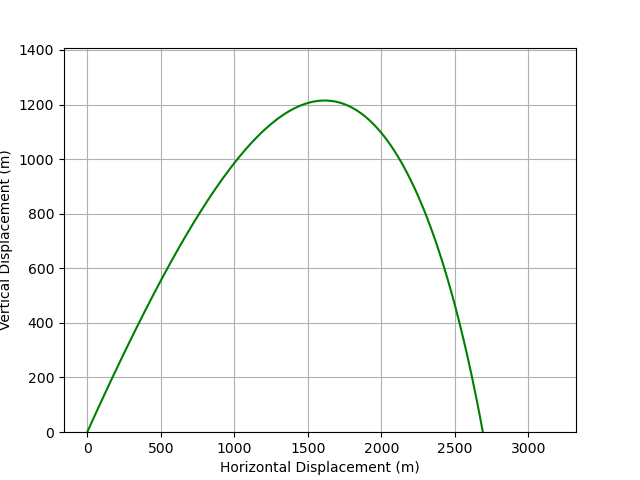

In [7]:
#codes
fig3 = plt.figure('Constant Drag Force')
ax3 = fig3.add_axes([0.1,0.1,0.8,0.8])
ax3.plot(res2.y[0], res2.y[1],'g', label=r'$x4$')
plt.ylim(0)
ax3.set_xlabel('Horizontal Displacement (m)')
ax3.set_ylabel('Vertical Displacement (m)')
ax3.grid()

# Part d)

Now include the drag term with the atmospheric variation included [meaning $c(y) = \gamma D^2exp(-y/\lambda)$]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex). For this part write out explicitly what $c$ is in your equations, e.g. $a*c = a* \gamma D^2exp(-y/\lambda)$. Your equations should depend only on $\gamma, \lambda, y, D, v, v_x, v_y, m,$ and $g$.

Equations with no air resistance ($c = \gamma D^2exp(-y/\lambda)$):

* $v_x' = $

* $x' = $

* $v_y' = $

* $y' = $

Code the equations into a function

In [8]:
#coded = 0.15


def var_drag(gama, d, y, lmbd):
    
    return (gama*(d**2)*np.exp(-y/lmbd))

def proj_vac3(t, state, m, g, d, lmbd, gama):
    
    g = 9.81
    
    x = state[0]
    y = state[1]
    
    vx = state[2]
    vy = state[3]
    
    dxdt = vx
    dydt = vy
    
    c = var_drag(gama,d, y, lmbd)
    
    dvxdt = -(c*np.sqrt((vx**2)+(vy**2))*vx)/m
    dvydt = (-(m*9.81)-(c*np.sqrt((vx**2)+(vy**2))*vy))/m
  
    ans = [dxdt, dydt, dvxdt, dvydt]
    return ans


Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 35\;s$

In [9]:
#codes
t0=0
tf2 =35
t_s3= np.linspace(t0, tf2, 1000)
res3 = integrate.solve_ivp(proj_vac3, (t_s2[0], t_s2[-1]), initial_state, method='RK45', t_eval=t_s2, args=(m, g, d, lmbd, gama))
print(res3)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 86
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.05005005,  0.1001001 ,  0.15015015,  0.2002002 ,
        0.25025025,  0.3003003 ,  0.35035035,  0.4004004 ,  0.45045045,
        0.5005005 ,  0.55055055,  0.6006006 ,  0.65065065,  0.7007007 ,
        0.75075075,  0.8008008 ,  0.85085085,  0.9009009 ,  0.95095095,
        1.001001  ,  1.05105105,  1.1011011 ,  1.15115115,  1.2012012 ,
        1.25125125,  1.3013013 ,  1.35135135,  1.4014014 ,  1.45145145,
        1.5015015 ,  1.55155155,  1.6016016 ,  1.65165165,  1.7017017 ,
        1.75175175,  1.8018018 ,  1.85185185,  1.9019019 ,  1.95195195,
        2.002002  ,  2.05205205,  2.1021021 ,  2.15215215,  2.2022022 ,
        2.25225225,  2.3023023 ,  2.35235235,  2.4024024 ,  2.45245245,
        2.5025025 ,  2.55255255,  2.6026026 ,  2.65265265,  2.7027027 ,
        2.75275275,  2.8028028

Plot the ball's trajectory and find it's horizontal range. At what time does it hit the ground?

<IPython.core.display.Javascript object>


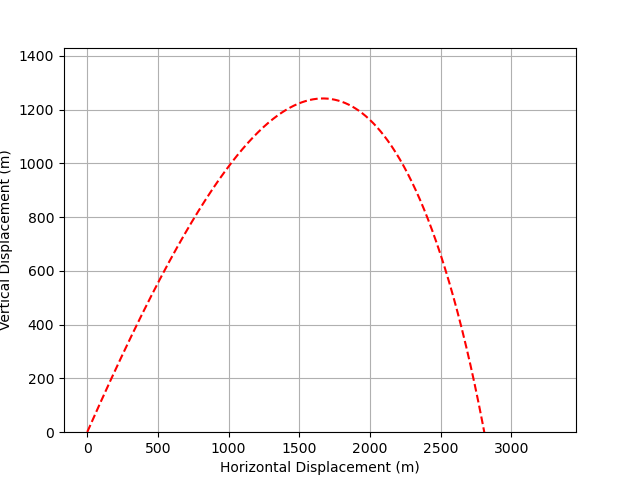

In [10]:
#codes
fig4 = plt.figure('Variable Drag Force')
ax4 = fig4.add_axes([0.1,0.1,0.8,0.8])
ax4.plot(res3.y[0], res3.y[1], 'r', linestyle='dashed', label=r'$x5$')
plt.ylim(0)
ax4.set_xlabel('Horizontal Displacement (m)')
ax4.set_ylabel('Vertical Displacement (m)')
ax4.grid()


# Part e)

Plot the trajectories from parts a), c), and d) on the same plot.

<IPython.core.display.Javascript object>


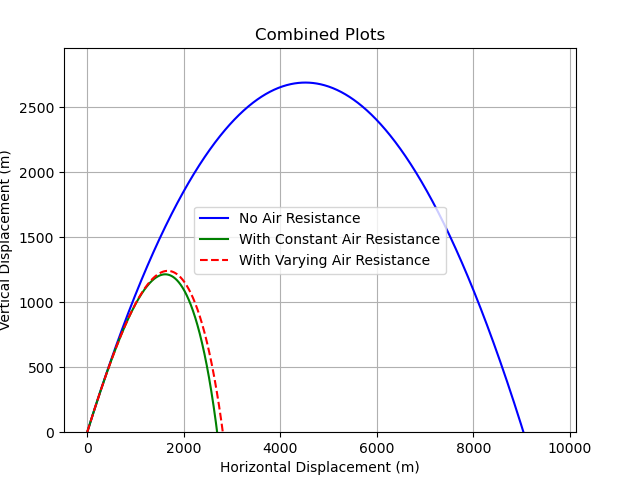

In [13]:
#codes
fig5 = plt.figure('All the graphs')
ax5 = fig5.add_axes([0.1, 0.1, 0.8, 0.8])

ax5.plot(res.y[0], res.y[1], 'b', label=r'No Air Resistance')
ax5.plot(res2.y[0], res2.y[1], 'g', label=r'With Constant Air Resistance')
ax5.plot(res3.y[0], res3.y[1], 'r', linestyle='dashed', label=r'With Varying Air Resistance')

ax5.set_ylim(0)

ax5.set_xlabel('Horizontal Displacement (m)')
ax5.set_ylabel('Vertical Displacement (m)')
ax5.set_title('Combined Plots')

ax5.legend()
ax5.grid()
plt.show()


Your results should look like the plot below.

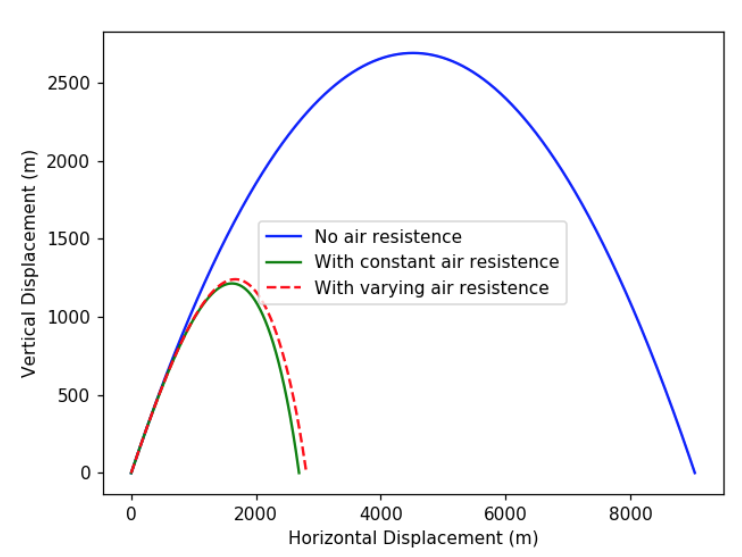

**What impacts the motion more: turning on air resistance (i.e with $c(0)$) or turning on the variation with atmosphere (i.e. $c(y)$) ?**